In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

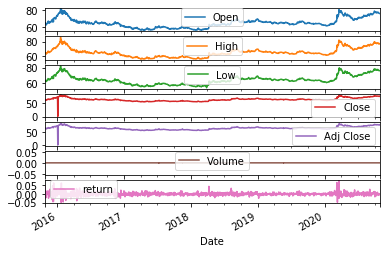

In [3]:
USDRUB = pd.read_csv('USDRUB=X.csv', index_col='Date', parse_dates=True)
USDRUB['return'] = USDRUB['Open'].pct_change()
USDRUB.plot(subplots=True)
plt.show()

In [3]:
USDRUB.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2015-10-27,62.292000,65.028503,62.292000,62.950001,62.950001,0.0,NaN
2015-10-28,64.975998,65.481499,63.441002,65.419998,65.419998,0.0,0.043087
2015-10-29,63.424999,64.646004,63.375000,63.935001,63.935001,0.0,-0.023870
2015-10-30,64.300003,64.641502,63.703499,64.190002,64.190002,0.0,0.013796
2015-11-02,64.114998,64.367996,63.450001,64.120003,64.120003,0.0,-0.002877


In [4]:
data=USDRUB['return'].dropna()

aapl = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
aapl['return'] = aapl['Open'].pct_change()
aapl.plot(subplots=True)
plt.show()

data=aapl['return'].dropna()
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
data.plot(ax=ax2)
aapl['Open'].plot(ax=ax1)
plt.show()

In [5]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [5]:
from arch import arch_model
garch_model = arch_model(data, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')

NameError: name 'data' is not defined

https://bashtage.github.io/arch/univariate/introduction.html

In [7]:
garch_result = garch_model.fit()

print(garch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 25588303783.447334
Iteration:      2,   Func. Count:     20,   Neg. LLF: 9.287725591613866e+18
Iteration:      3,   Func. Count:     35,   Neg. LLF: 26797269377.987156
Iteration:      4,   Func. Count:     48,   Neg. LLF: -4413.431043823735
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4413.431048171028
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                4413.43
Distribution:                  Normal   AIC:                          -8818.86
Method:            Maximum Likelihood   BIC:                          -8798.17
                       

C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


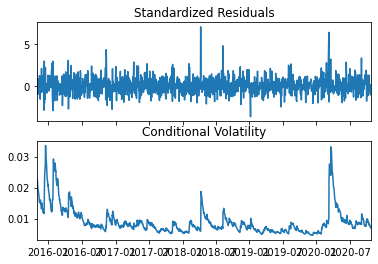

In [8]:
garch_result.plot()
plt.show()

Visual check: compare the initial return data and the standardized residuals

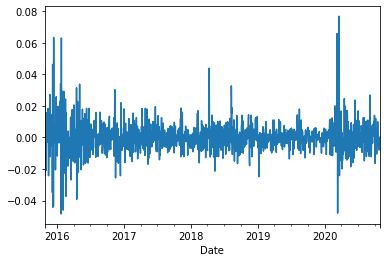

In [9]:
data.plot()
plt.show()

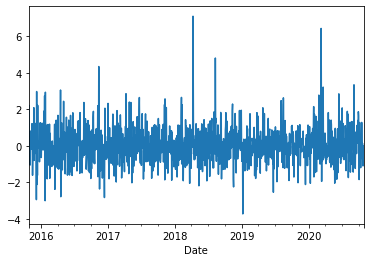

In [10]:
y = garch_result.resid/garch_result.conditional_volatility
y.plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


P-values are:  [0.69343372 0.52202571 0.05071452 0.07529018 0.11346452 0.17844135
 0.15016478 0.11807429 0.04954795 0.07549735]


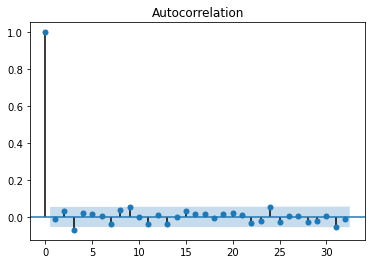

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, alpha = 0.05)

from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(y, lags = 10)
print('P-values are: ', lb_test[1])
# if p-value < 5%, then the model is not sound

Forecasting

The values in the columns h.1 are one-step ahead forecast, while values in h.2, …, h.5 are 2, …, 5-observation ahead forecasts. The output is aligned so that the Date column is the final data used to generate the forecast, so that h.1 in row 2020-10-27 is the one-step ahead forecast made using data up to and including 2020-10-27.

By default forecasts are only produced for observations after the final observation used to estimate the model.

In [12]:
# 1-step ahead forecast
garch_forecast = garch_result.forecast(horizon = 5)
print(garch_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-10-27  0.000042  0.000044  0.000045  0.000046  0.000047


Another assumptions about distribution

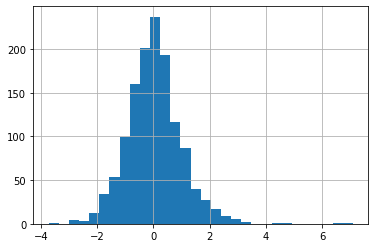

In [13]:
garch_std_resid = garch_result.resid / garch_result.conditional_volatility
garch_std_resid.hist(bins=30)
plt.show()

In [14]:
garch_t_model = arch_model(data, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
garch_t_result = garch_t_model.fit()
garch_t_result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 153604.8257204187
Iteration:      2,   Func. Count:     25,   Neg. LLF: 1696409.4734605495
Iteration:      3,   Func. Count:     34,   Neg. LLF: 5659.379659381707
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5352281.847847602
Iteration:      5,   Func. Count:     61,   Neg. LLF: 92695.31791691031
Iteration:      6,   Func. Count:     78,   Neg. LLF: 56565.537475055964
Iteration:      7,   Func. Count:     85,   Neg. LLF: 123101.38938620091
Iteration:      8,   Func. Count:     96,   Neg. LLF: 56437.33951374516
Iteration:      9,   Func. Count:    103,   Neg. LLF: 56577.4879435905
Iteration:     10,   Func. Count:    120,   Neg. LLF: 56577.44890071368
Iteration:     11,   Func. Count:    128,   Neg. LLF: 56436.89509371384
Iteration:     12,   Func. Count:    135,   Neg. LLF: 56436.89520672157
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56436.89509369184
            Iterations: 14

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Constant Mean - GARCH Model Results                             
=============================================================================================
Dep. Variable:                            return   R-squared:          -65550647692239344.000
Mean Model:                        Constant Mean   Adj. R-squared:     -65550647692239336.000
Vol Model:                                 GARCH   Log-Likelihood:                   -56436.9
Distribution:      Standardized Skew Student's t   AIC:                               112886.
Method:                       Maximum Likelihood   BIC:                               112917.
                                                   No. Observations:                     1305
Date:                           Thu, Oct 29 2020   Df Residuals:                         1299
Time:                                   12:15:31   Df Model:                                6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.5717e+06    347.368   7403.308      0.000 [2.571e+06,2.572e+06]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.0089e-03  1.401e-03      0.720      0.471 [-1.737e-03,3.754e-03]
alpha[1]       1.0000  1.347e-02     74.254      0.000      [  0.974,  1.026]
beta[1]    2.4202e-10  4.566e-03  5.301e-08      1.000 [-8.949e-03,8.949e-03]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.0834  7.312e-05  2.849e+04      0.000 [  2.083,  2.084]
lambda        -1.0000  1.073e-10 -9.319e+09      0.000 [ -1.000, -1.000]
========================================================================

Covariance estimator: robust
"""

In [15]:
garch_ar_model = arch_model(data, p = 1, q = 1, mean = 'AR', vol = 'GARCH', dist = 'normal')
garch_ar_result = garch_ar_model.fit()
garch_ar_result.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 25588303783.447334
Iteration:      2,   Func. Count:     20,   Neg. LLF: 9.287725591613866e+18
Iteration:      3,   Func. Count:     35,   Neg. LLF: 26797269377.987156
Iteration:      4,   Func. Count:     48,   Neg. LLF: -4413.431043823735
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4413.431048171028
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 4


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                 return   R-squared:                      -0.001
Mean Model:                        AR   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                4413.43
Distribution:                  Normal   AIC:                          -8818.86
Method:            Maximum Likelihood   BIC:                          -8798.17
                                        No. Observations:                 1305
Date:                Thu, Oct 29 2020   Df Residuals:                     1301
Time:                        12:15:34   Df Model:                            4
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const      -1.5870e-04  1.151e-05    -13.783  3.226e-43 [-1.813e-04,-1.361e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0179e-06  1.375e-11  1.467e+05      0.000 [2.018e-06,2.018e-06]
alpha[1]       0.1000  3.391e-02      2.949  3.189e-03   [3.354e-02,  0.166]
beta[1]        0.8800  2.473e-02     35.587 2.225e-277     [  0.832,  0.928]
============================================================================

Covariance estimator: robust
"""

In [16]:
garch_gjr_model = arch_model(data, p = 1, o = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')
garch_gjr_result = garch_gjr_model.fit()
garch_gjr_result.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 35079798361.94468
Iteration:      2,   Func. Count:     22,   Neg. LLF: 4058467.469034685
Iteration:      3,   Func. Count:     36,   Neg. LLF: 4.87997170784563e+16
Iteration:      4,   Func. Count:     52,   Neg. LLF: 1754715587.6449668
Iteration:      5,   Func. Count:     66,   Neg. LLF: 81789099698688.75
Iteration:      6,   Func. Count:     82,   Neg. LLF: 546417923.2827408
Iteration:      7,   Func. Count:     95,   Neg. LLF: -4412.393841190635
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4412.393843974904
            Iterations: 11
            Function evaluations: 95
            Gradient evaluations: 7


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                 return   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                  GJR-GARCH   Log-Likelihood:                4412.39
Distribution:                  Normal   AIC:                          -8814.79
Method:            Maximum Likelihood   BIC:                          -8788.92
                                        No. Observations:                 1305
Date:                Thu, Oct 29 2020   Df Residuals:                     1300
Time:                        12:15:38   Df Model:                            5
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -1.8692e-04  2.076e-05     -9.005  2.154e-19 [-2.276e-04,-1.462e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0179e-06  2.445e-12  8.253e+05      0.000 [2.018e-06,2.018e-06]
alpha[1]       0.1000  3.342e-02      2.992  2.767e-03   [3.450e-02,  0.165]
gamma[1]   9.9999e-03  5.691e-02      0.176      0.861     [ -0.102,  0.122]
beta[1]        0.8750  3.197e-02     27.371 6.143e-165     [  0.812,  0.938]
============================================================================

Covariance estimator: robust
"""

In [18]:
egarch_model = arch_model(data, p = 1, o = 1, q = 1, mean = 'constant', vol = 'EGARCH', dist = 'normal')
egarch_result = egarch_model.fit()
egarch_result.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4.436769310826027e+20
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1815020072068.686
Iteration:      3,   Func. Count:     31,   Neg. LLF: 5137309290178.333
Iteration:      4,   Func. Count:     41,   Neg. LLF: 84551721974.40259
Iteration:      5,   Func. Count:     51,   Neg. LLF: 4261.5812830711775
Iteration:      6,   Func. Count:     60,   Neg. LLF: -4427.54017582436
Iteration:      7,   Func. Count:     66,   Neg. LLF: -4427.681256553029
Iteration:      8,   Func. Count:     72,   Neg. LLF: -4427.682489418332
Iteration:      9,   Func. Count:     78,   Neg. LLF: -4427.682561931971
Iteration:     10,   Func. Count:     84,   Neg. LLF: -4427.682567198598
Iteration:     11,   Func. Count:     89,   Neg. LLF: -4427.682567206336
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4427.682567198598
            Iterations: 11
            Function evaluations: 89
            Gradient eval

C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:292: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                 return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                     EGARCH   Log-Likelihood:                4427.68
Distribution:                  Normal   AIC:                          -8845.37
Method:            Maximum Likelihood   BIC:                          -8819.50
                                        No. Observations:                 1305
Date:                Thu, Oct 29 2020   Df Residuals:                     1300
Time:                        12:15:43   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0910e-04  1.594e-04      0.684      0.494 [-2.033e-04,4.215e-04]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         -0.2277  9.244e-02     -2.463  1.377e-02 [ -0.409,-4.651e-02]
alpha[1]       0.1757  5.532e-02      3.177  1.490e-03  [6.730e-02,  0.284]
gamma[1]       0.1013  2.575e-02      3.936  8.279e-05  [5.088e-02,  0.152]
beta[1]        0.9757  9.852e-03     99.034      0.000    [  0.956,  0.995]
===========================================================================

Covariance estimator: robust
"""

Simulation

In [195]:
from scipy.stats import norm

n = 1000 #
random.seed(55)
e = norm.rvs(size=n)
eps = e.copy() # ARCH
r = e.copy() # AR + ARCH
sig2 = e.copy()**2 # conditional variance
sig = e.copy()
# parameters for ARCH
omega = 1
alpha = 0.5
beta = 0.4
#parameters for AR
phi = 0.9
mu = 2.5

In [206]:
import random
import math

for t in range(1,(n-1)):
  eps[t] = math.sqrt(sig2[t])*e[t] 
  r[t] = mu + eps[t] + phi*(r[t-1]-mu)  # modelling of mean
  sig2[t+1] = omega + alpha * eps[t]**2 + beta * sig[t]**2 # modelling for ARCH



Text(0.5, 1.0, '(b) ARCH part')

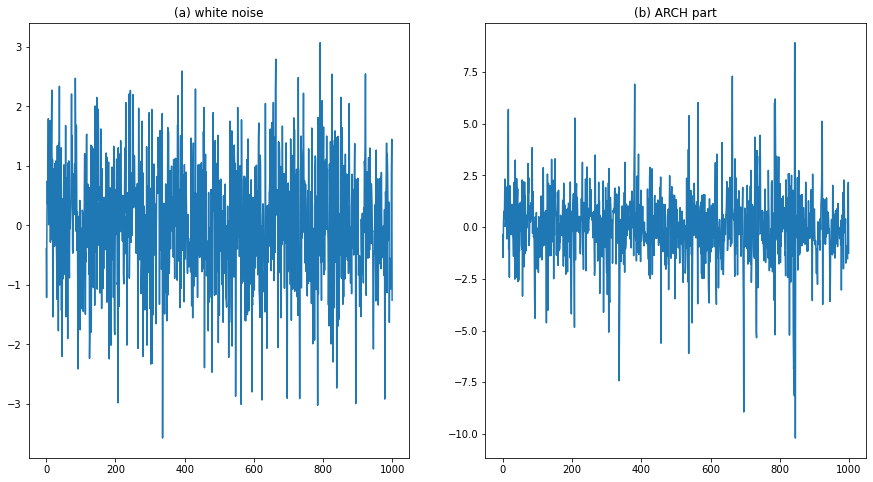

In [207]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(e)
ax1.set_title("(a) white noise")
ax2.plot(eps)
ax2.set_title("(b) ARCH part")

Text(0.5, 1.0, '(b) conditional variance')

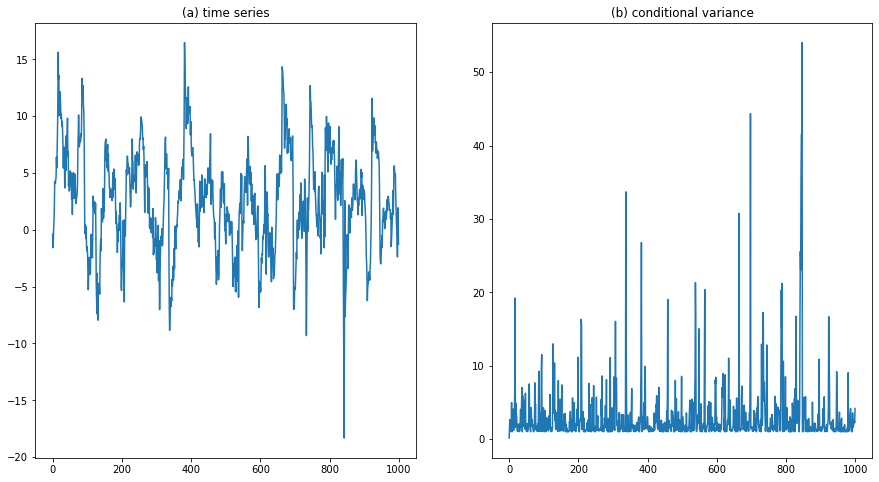

In [208]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(r)
ax1.set_title("(a) time series")
ax2.plot(sig2)
ax2.set_title("(b) conditional variance")

In [4]:
s = e.copy()
for t in range(1,n):
    s[t] = r[t] + s[t-1]

NameError: name 'e' is not defined

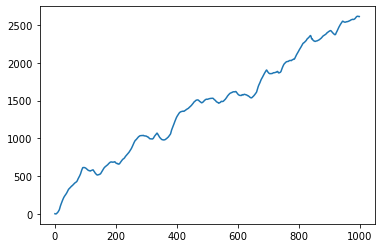

In [212]:
x_axis = range(0,n)
plt.plot(x_axis, s)
plt.show()

In [202]:
a = pd.Series(s,index=x_axis)

a.to_csv('data_2.csv')